In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
# 1. "sample_data.csv"から表データをpandasでロードし、インデックスを"time"カラムに設定
df = pd.read_csv('sample_data.csv', index_col='time')
# "machine_file.csv"から表データをpandasでロード
machine_df = pd.read_csv('machine_file.csv')
# machine_df = machine_df.set_index('ID')

# dfデータフレームに"type"カラムを追加
df = df.reset_index().merge(machine_df[['ID', 'type']], on='ID', how='left').set_index('time')

# 2. ロードしたデータから各IDごとの平均、分散、サンプルサイズをまとめたDataFrameを作る
result = df.groupby('ID').agg({'value': ['mean', 'var', 'count']})
result.columns = ['mean', 'var', 'count']

<AxesSubplot:xlabel='ID', ylabel='value'>

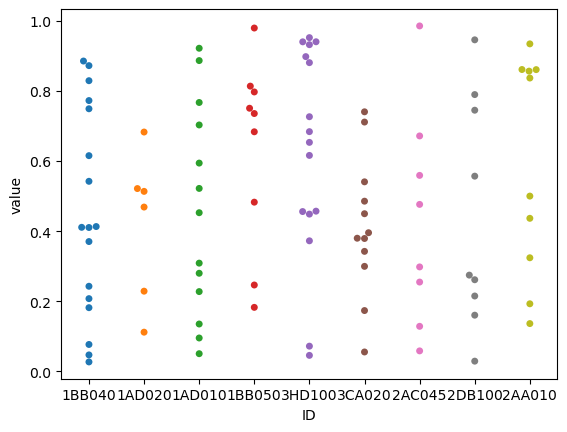

In [48]:
# IDごとにvalueの分布を表示する図を作成する
sns.swarmplot(x='ID', y='value', data=df)

In [32]:
# machine_id = ['1AD010', '1AD020', '1BB040', '1BB050', '2AA010', '2AC045', '2DB100', '3CA020', '3HD100']
# machine_type = ['B', 'C', 'B', 'A', 'D', 'C', 'A', 'B', 'B']

# data = {'ID':machine_id,
#         'type':machine_type}

# df = pd.DataFrame(data)
# df.to_csv('machine_file.csv', index=False)

In [ ]:
# for type in ['A', 'B', 'C', 'D']:
#     # typeが"A"のデータのみ抽出します。
#     df_graph = df[df["type"] == type]

#     # グラフを2つ作成します。
#     fig, (ax1, ax2) = plt.subplots(1, 2)

#     # 箱ひげ図を作成します。
#     # sns.boxplot(x="ID", y="value", data=df, ax=ax1)

#     # IDごとにvalueの分布を表示する図を作成する
#     sns.swarmplot(x='ID', y='value', data=df, ax=ax2)

#     plt.tight_layout()

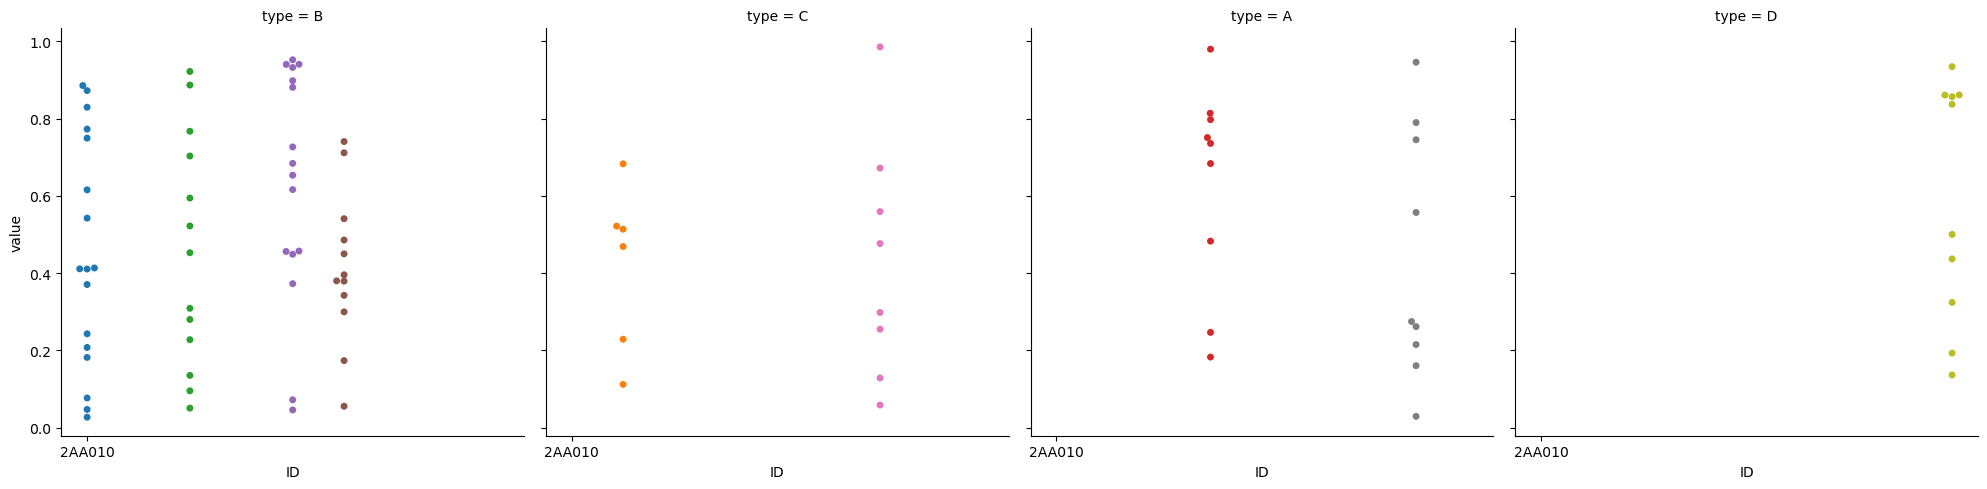

In [54]:
g = sns.catplot(x="ID", y="value", col="type", data=df, kind="swarm")
# typeごとに横軸のラベルを設定します。
for ax in g.axes.flat:
    # 現在のグラフのtypeを取得します。
    current_type = ax.get_title().split(" = ")[-1]
    
    # 現在のグラフのtypeに対応するデータを抽出します。
    current_data = df[df["type"] == current_type]
    
    # 目盛りの位置を設定します。
    ax.set_xticks(range(len(current_data["ID"].unique())))
    
    # 横軸のラベルを設定します。
    ax.set_xticklabels(current_data["ID"].unique())

TypeError: unsupported operand type(s) for -: 'str' and 'float'

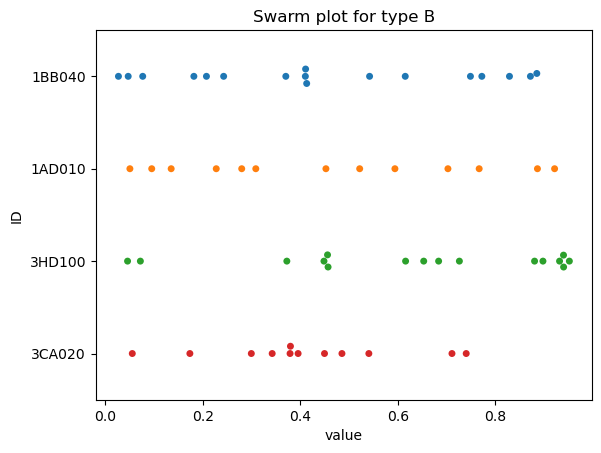

In [93]:
ID = ['1BB040', '1AD020', '1AD010', '1BB050', '3HD100', '3CA020','2AC045', '2DB100', '2AA010']
th = {}
for id in ID:
    if id[0] == '1':
        th[id] = 0.3
    elif id[0] == '2':
        th[id] = 0.4
    else:
        th[id] = 0.5

def create_swarm_plot(data, th):
    types = data['type'].unique()
    for t in types:
        plt.figure()
        ax = sns.swarmplot(x='value', y='ID', hue='ID', data=data[data['type'] == t], orient='h')
        ax.legend_.remove()
        plt.title(f'Swarm plot for type {t}')
        for id, threshold in th.items():
            y_pos = data[data['ID'] == id].index[0]
            ax.axvline(x=threshold, ymin=y_pos-0.2, ymax=y_pos+0.2, linestyle='--', color='grey')
    plt.show()

# def create_swarm_plot(data, th):
#     types = data['type'].unique()
#     for t in types:
#         plt.figure()
#         ax = sns.swarmplot(x='value', y='ID', hue='ID', data=data[data['type'] == t], orient='h')
#         ax.legend_.remove()
#         plt.title(f'Swarm plot for type {t}')
#         for id, threshold in th.items():
#             plt.axvline(threshold, linestyle='--', color='grey')
#             plt.text(threshold + 1, -0.5, f'{id}: {threshold}')
#     plt.show()
create_swarm_plot(df, th)

In [66]:
ID = ['1BB040', '1AD020', '1AD010', '1BB050', '3HD100', '3CA020','2AC045', '2DB100', '2AA010']
th = {}
for id in ID:
    th[id] = 0.3

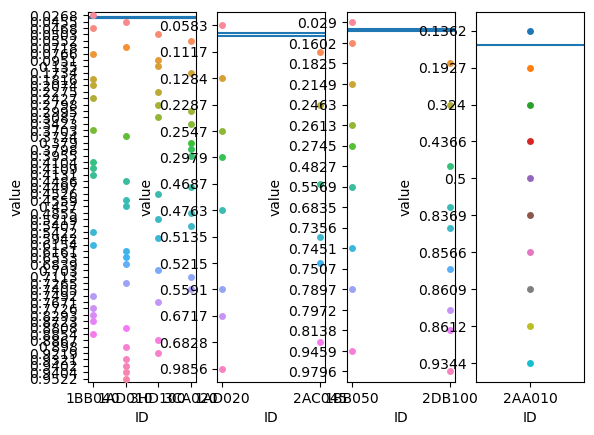

In [92]:

# def create_swarm(df, th):
#     # typeのユニークな値を取得し、グラフの数を決定する
#     types = df['type'].unique()
#     n_graphs = len(types)

#     # グラフの数に応じてサブプロットを作成する
#     fig, axes = plt.subplots(1, n_graphs)

#     for i, t in enumerate(types):
#         # typeごとにデータフレームをフィルタリングする
#         data = df[df['type'] == t]
        
#         # 横軸の目盛りを動的に設定する
#         xticks = data['ID'].unique()
        
#         # スワームプロットを作成する
#         sns.swarmplot(x='ID', y='value', data=data, ax=axes[i], orient='h')
        
#         # スレッショルド線分を描画する
#         for id in xticks:
#             threshold = th[id]
#             axes[i].axhline(y=threshold)
        
#         # 横軸の目盛りとラベルを設定する
#         axes[i].set_xticks(range(len(xticks)))
#         axes[i].set_xticklabels(xticks)
    
#     plt.show()
# create_swarm(df, th)